###Setup TensorFlow

In [41]:
import tensorflow as tf
print("tensorflow version:", tf.__version__)

tensorflow version: 2.8.2


###Load Dataset

In [42]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0

###Build a Machine learning Model

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

#####plot model

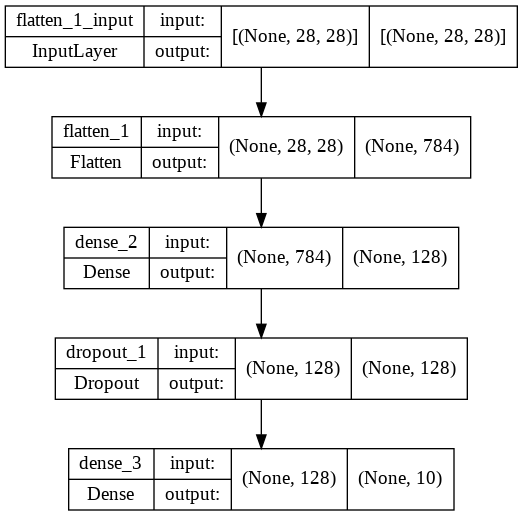

In [44]:
tf.keras.utils.plot_model(model,rankdir="TD",show_shapes = True)

In [45]:
y_train.size

60000

In [46]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.25257418,  0.0628353 , -0.30039066,  0.21716031, -0.07132459,
        -0.33796972, -0.5428897 , -0.19585177, -0.16250505,  0.79322416]],
      dtype=float32)

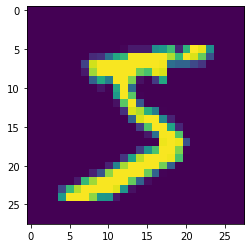

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(x_train[:1],(28,28)))

In [48]:
tf.nn.softmax(predictions).numpy()

array([[0.12326827, 0.10196444, 0.07090906, 0.11897927, 0.08916284,
        0.06829382, 0.05563982, 0.07872315, 0.08139256, 0.21166675]],
      dtype=float32)

In [49]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_function(y_test[:1],predictions).numpy()

2.5418181

###compile Model

In [50]:
model.compile(optimizer='adam',
              loss = loss_function,
              metrics = ['accuracy'])

###Train model

In [51]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1390 - accuracy: 0.9590
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1044 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0847 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0730 - accuracy: 0.9778


###Model Evaluation

In [52]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0707 - accuracy: 0.9784 - 537ms/epoch - 2ms/step


[0.07074908167123795, 0.9783999919891357]

In [53]:
probility_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [54]:
probility_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.2920503e-06, 1.8818673e-09, 1.6884063e-05, 1.9737806e-04,
        2.7099031e-10, 3.5361757e-07, 9.9144195e-13, 9.9978083e-01,
        3.7835696e-07, 2.8989296e-06],
       [6.9376277e-08, 7.2964502e-04, 9.9926966e-01, 4.4634425e-07,
        5.5177180e-14, 7.5651281e-09, 1.4541031e-08, 1.2683152e-12,
        7.4361914e-08, 2.3325218e-12],
       [4.3596185e-07, 9.9842852e-01, 1.5210849e-04, 5.5893929e-06,
        1.6950830e-04, 1.3763662e-05, 9.0624153e-06, 8.4284431e-04,
        3.6600980e-04, 1.2110162e-05],
       [9.9963188e-01, 2.9248000e-09, 1.1691578e-05, 2.2178600e-08,
        1.6201126e-05, 1.3729740e-06, 3.2341279e-04, 9.0084304e-06,
        4.0044071e-08, 6.4049837e-06],
       [4.8453160e-07, 5.5463256e-09, 2.7951438e-07, 4.4730419e-09,
        9.9876261e-01, 1.4041268e-07, 2.6576222e-06, 2.0583777e-05,
        1.0471043e-06, 1.2121520e-03]], dtype=float32)>